# Offline Evaluation Analysis

This notebook is used to:
* read prediction-evaluation data.
* make basic transformations.
* make an explorational data analysis.

## The data
The data contents summaries of metrics for unique combinations of the hashtags(case-unsensitive):
* #Trump
* #News
* #FakeNews
* #Democrats
* #Politics
The combination is generated with boolean flags for every hashtag.
If a tweet does not contain any of these hashtags, it links to a valid combination aswell. This combination is therefore '[false,false,false,false,false]'.

Summaries about the last 60 seconds are recorded every second for every unique hashtag combination. If a combination did not occure in this timewindow, no summary is recorded for this combination.

### Used metrics
Following metrics were calculated for every occuring hashtag combination in a timewindow of the last 60 seconds:
* count - The total count of tweets for this combination
* meanTextLength - the mean length of a not truncated tweet (hashtags and mentions included)
* meanHashtagCount - The mean count of hashtags
* meanTrumpCount - The mean occurences of the word 'trump' in the tweet texts; not case-sensitive.
* meanSensitiveCount - The mean count of tweets flagged as "Possibly sensitive". (Flagging performed by Twitter)

These metrics are used to generate a prediction for hashtag combinations w.r.t. the time of the day.

## Used libaries
Make sure those are installed.

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta

### Plotting
And display in notebook.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 9.0)
%matplotlib inline

## Reading history CSV files

In [3]:
# The main working directory
mainDir = ""

evalFile = mainDir + "predictionsEvaluation.csv"

#### Plotfunction definition:

In [4]:
def plotMetric(df,metricName):
    traces = list()
    
    fig = plt.figure(figsize=(16,9))
    ax = plt.axes()

    for i in range(0,len(df)):
        df.plot(y=metricName, kind = 'bar', label=i, ax=ax)
    ax.legend().set_visible(False)

    plt.ylabel(metricName)
    
    plt.title('Mean of Metric: ' + metricName, fontsize=18)

In [5]:
def plotMetricTimeseries(dfList, metricName, timeName = 'timestamp', skip=0, kind = 'line'):
    traces = list()
    
    fig = plt.figure(figsize=(16,9))
    ax = plt.axes()

    for i in range(skip,len(dfList)):
        df = dfList[i]
        df.plot(x=timeName, y=metricName, label=i, ax=ax, linewidth = 0.5, kind = kind)
        
    titleStr= 'Timeseries of Metric: ' + metricName
    
    
    plt.xlabel(timeName)
    plt.ylabel(metricName)
    plt.suptitle('Timeseries of Metric: ' + metricName, fontsize=18)
    
    if(skip>0):
       plt.title('(skipped ' + str(skip) + ' datarows)', fontsize=10)
    
    plt.legend()

In [6]:
def plotErrorHist(df, metricName, bins=500, alpha=1.0, label = "", newFigure = True):
    traces = list()
    
    if(newFigure):
        fig = plt.figure(figsize=(16,9))
        ax = plt.axes()
    
    df[metricName].plot(kind = 'hist', label=label, bins = bins, alpha = alpha)
        
    titleStr = 'Histogram of: ' + metricName
    
    plt.xlabel(metricName)
    plt.title(titleStr, fontsize=18)

In [7]:
def plotErrorHistList(dfList, metricName, bins=200):
    traces = list()
    
    alpha=1/len(dfList)
    
    fig = plt.figure(figsize=(16,9))
    ax = plt.axes()

    for i in range(0,len(dfList)):
        df = dfList[i]
        plotErrorHist(df, metricName, bins=bins, alpha = 0.2, label=i, newFigure=False)
    plt.legend()

Due to the quantity of unique combinations, refer to this table for index-combo linking.

## Predictions Evaluation

#### Read prediction evaluation

In [8]:
predEvaluation = pd.read_csv(evalFile,
                             sep=";", 
                             header = 0)

In [9]:
predEvaluation.columns

Index(['timestamp', 'time', 'isTrumpTweet', 'isNewsTweet', 'isFakeNewsTweet',
       'isDemocratsTweet', 'isPoliticsTweet', 'errorCount',
       'errorMeanTextLength', 'errorMeanHashtagCount', 'errorMeanTrumpCount',
       'errorMeanSensitiveCount'],
      dtype='object')

#### Transformation

In [10]:
# transform timestamp strings to datetime format
predEvaluation['timestamp'] = pd.to_datetime(predEvaluation['timestamp']) + timedelta(hours=1)
predEvaluation['time'] = pd.to_datetime(predEvaluation['time']).apply(lambda x: x.time())

In [11]:
# group by hashtag combination, calculate mean values of metrics
meanEvals = predEvaluation.groupby(['isTrumpTweet',
                                    'isNewsTweet',
                                    'isFakeNewsTweet',
                                    'isDemocratsTweet',
                                    'isPoliticsTweet'])['errorCount',
                                                        'errorMeanTextLength',
                                                        'errorMeanHashtagCount',
                                                        'errorMeanTrumpCount',
                                                        'errorMeanSensitiveCount'].agg(np.mean).reset_index()

In [12]:
meanEvals[['isTrumpTweet',
           'isNewsTweet',
           'isFakeNewsTweet',
           'isDemocratsTweet',
           'isPoliticsTweet']]

,isTrumpTweet,isNewsTweet,isFakeNewsTweet,isDemocratsTweet,isPoliticsTweet
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,False,True,False
3,False,False,True,False,False
4,False,True,False,False,False
5,False,True,False,False,True
6,True,False,False,False,False
7,True,False,False,False,True
8,True,False,True,False,False
9,True,True,False,False,False


In [13]:
evalList = list()
for i in range(0, len(meanEvals)):
    evalList.append(meanEvals.loc[i,['isTrumpTweet','isNewsTweet','isFakeNewsTweet','isDemocratsTweet','isPoliticsTweet']].to_frame().transpose())

In [14]:
evalTimeseriesList = list()
for i in range(0,len(evalList)):
    evalTimeseriesList.append(evalList[i]
                              .merge(predEvaluation,on=['isTrumpTweet',
                                                        'isNewsTweet',
                                                        'isFakeNewsTweet',
                                                        'isDemocratsTweet',
                                                        'isPoliticsTweet']))

#### Plots

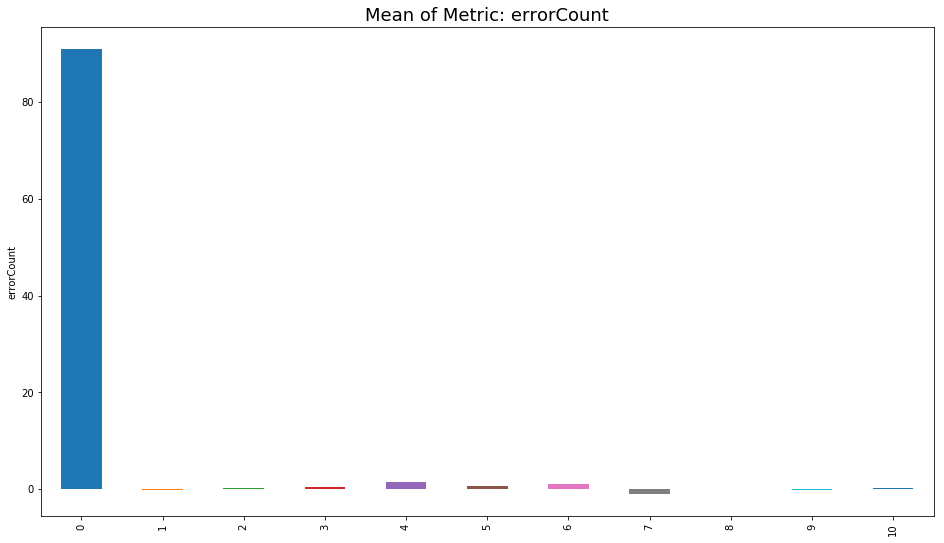

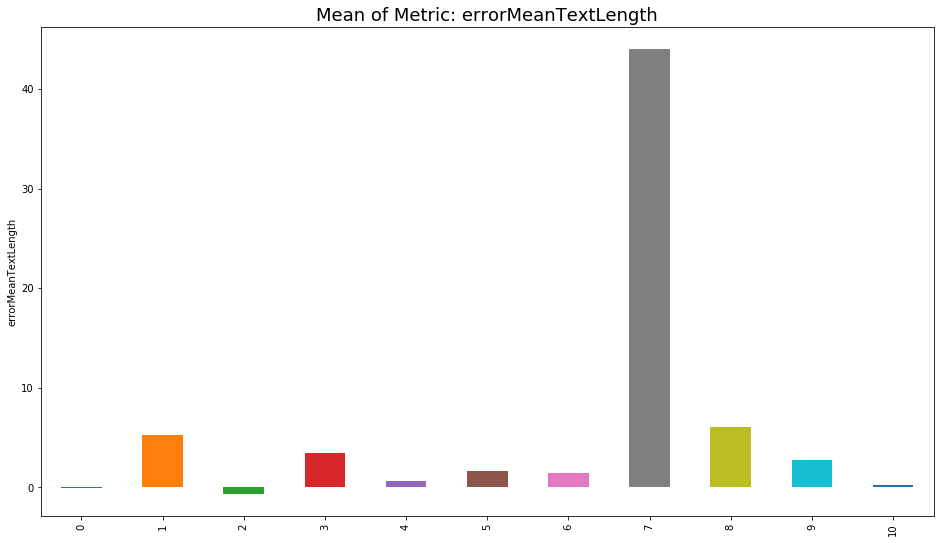

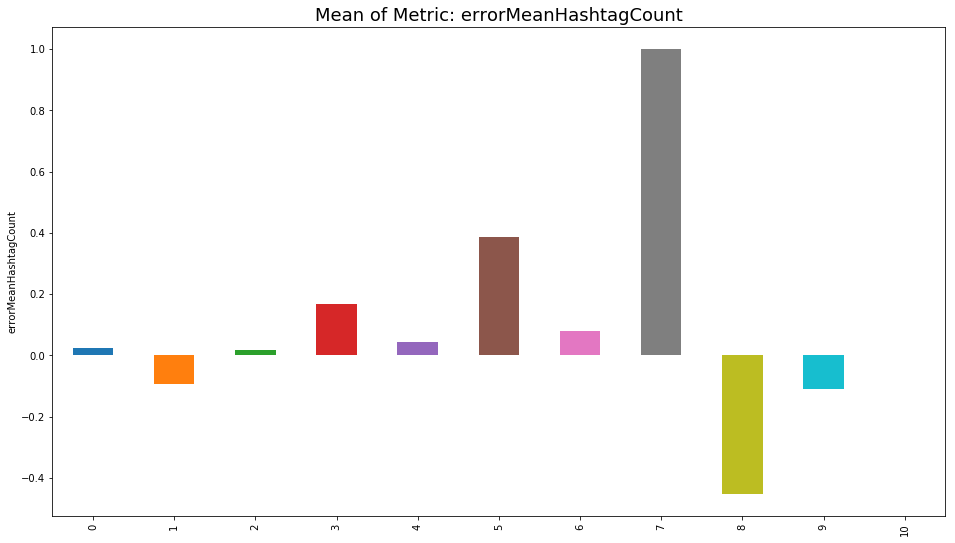

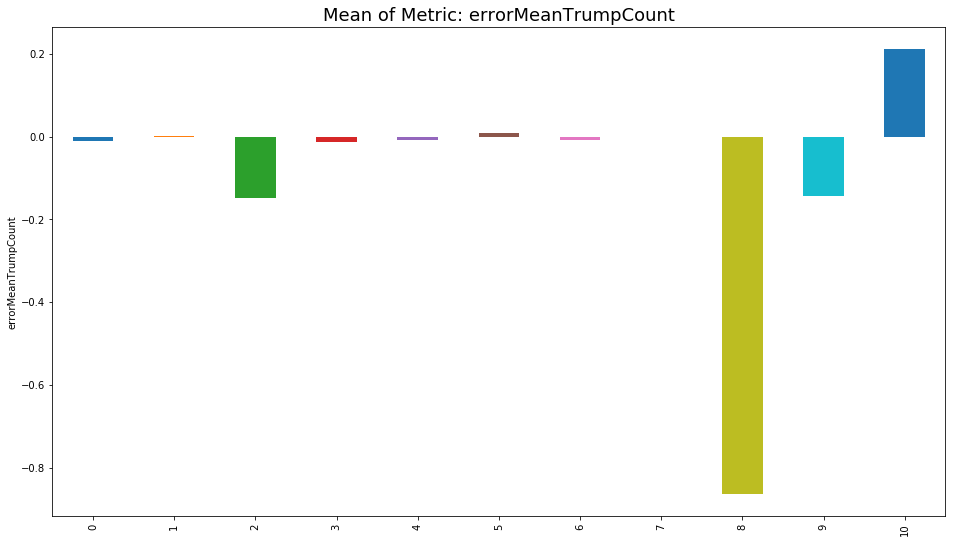

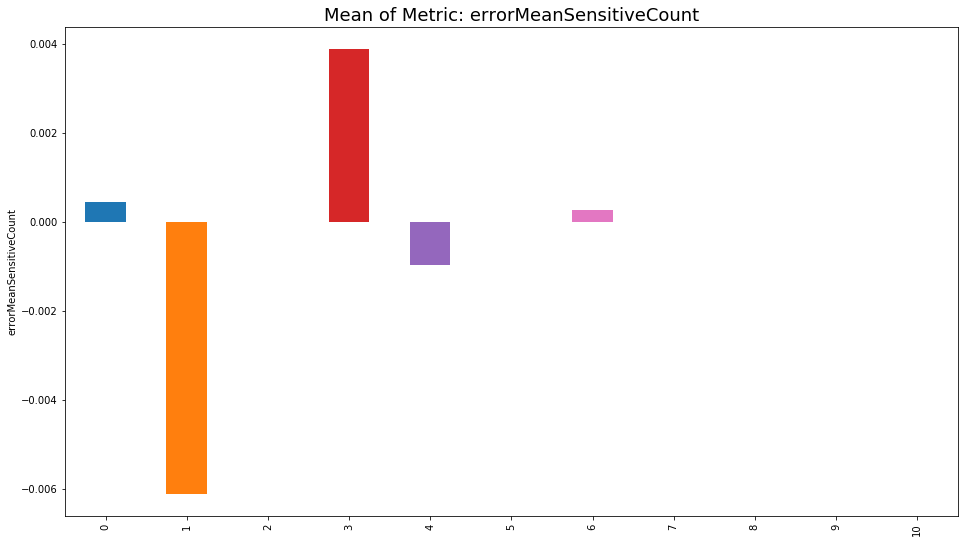

In [15]:
plotMetric(meanEvals, 'errorCount')
plotMetric(meanEvals, 'errorMeanTextLength')
plotMetric(meanEvals, 'errorMeanHashtagCount')
plotMetric(meanEvals, 'errorMeanTrumpCount')
plotMetric(meanEvals, 'errorMeanSensitiveCount')

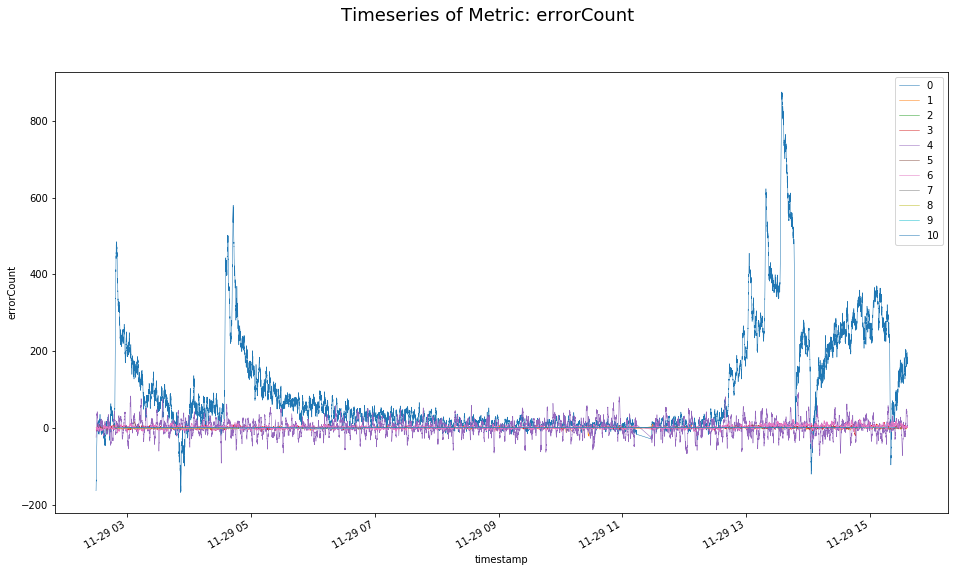

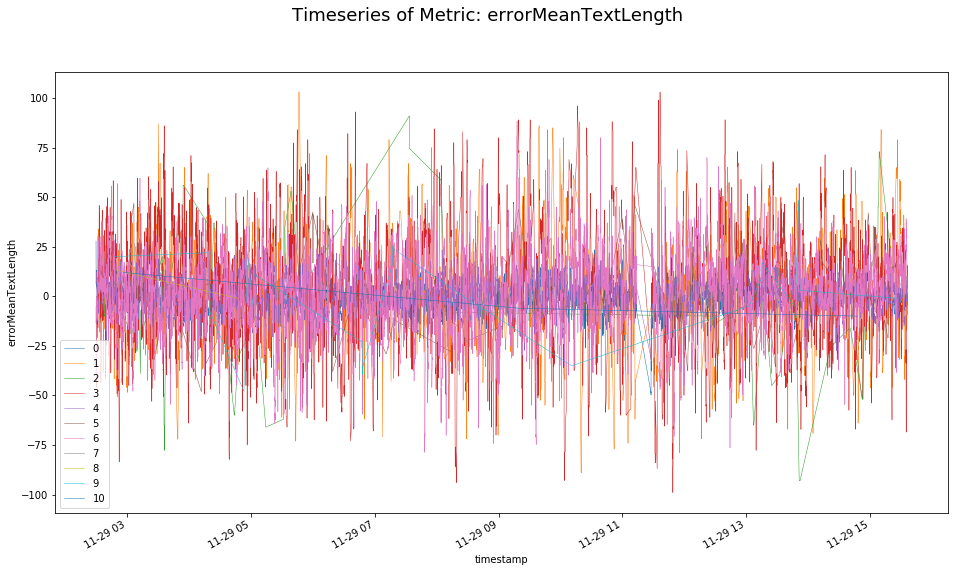

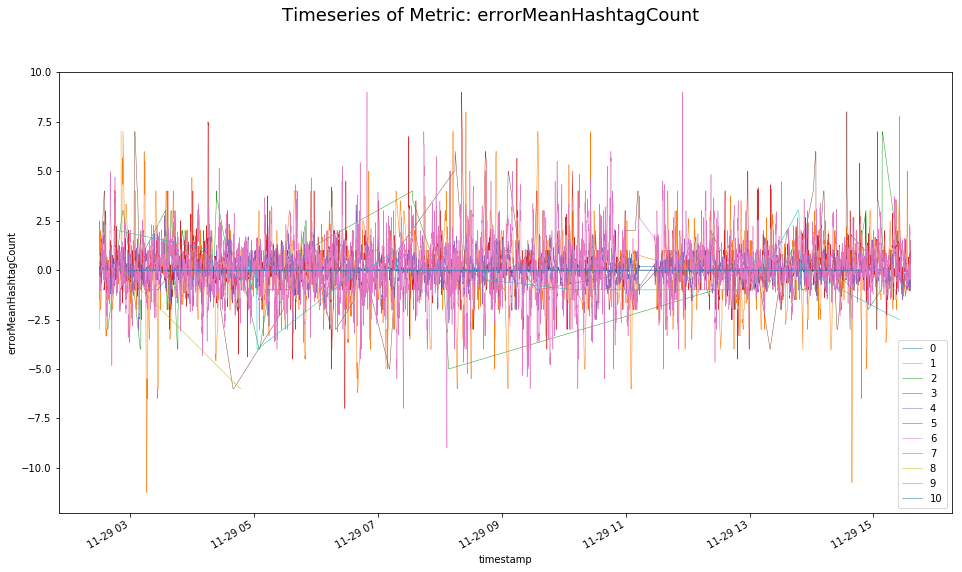

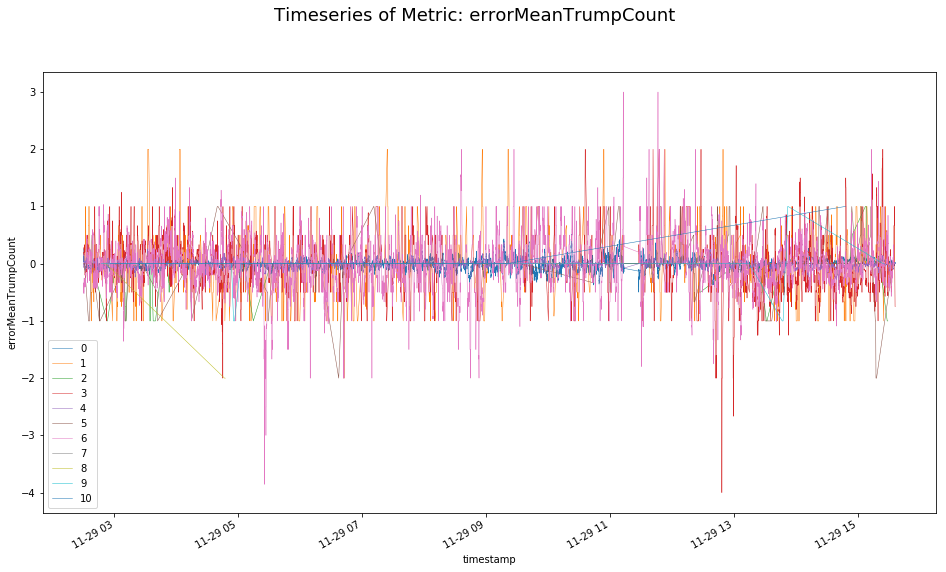

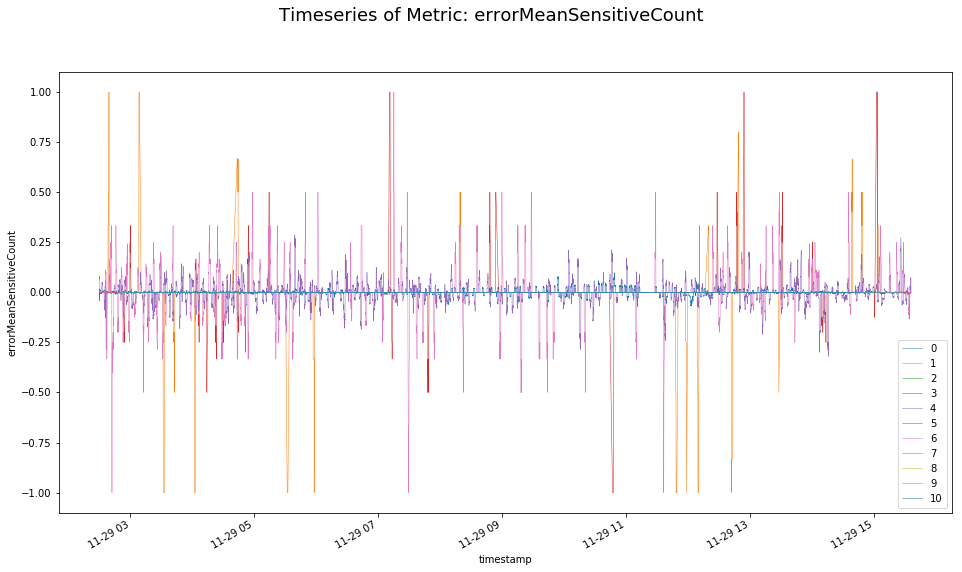

In [16]:
plotMetricTimeseries(evalTimeseriesList, 'errorCount')
plotMetricTimeseries(evalTimeseriesList, 'errorMeanTextLength')
plotMetricTimeseries(evalTimeseriesList, 'errorMeanHashtagCount')
plotMetricTimeseries(evalTimeseriesList, 'errorMeanTrumpCount')
plotMetricTimeseries(evalTimeseriesList, 'errorMeanSensitiveCount')

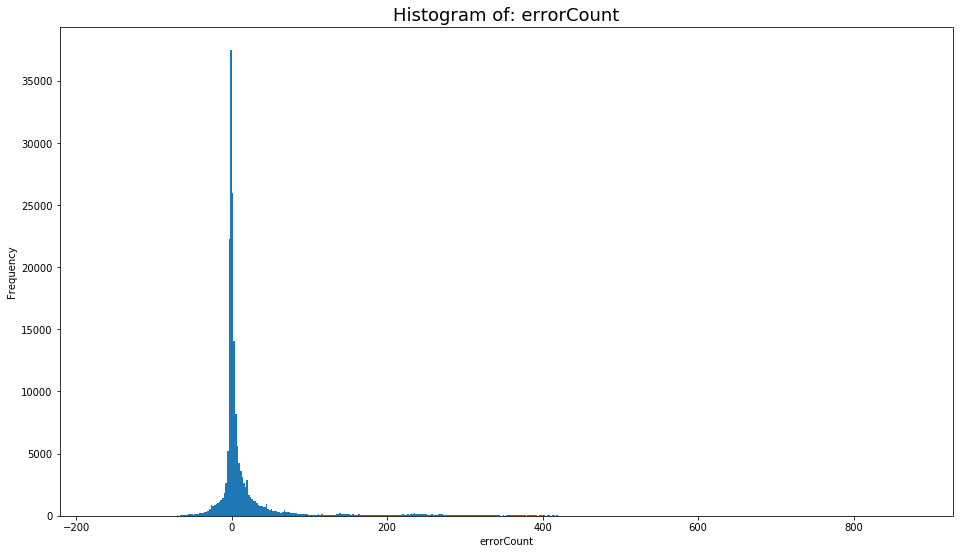

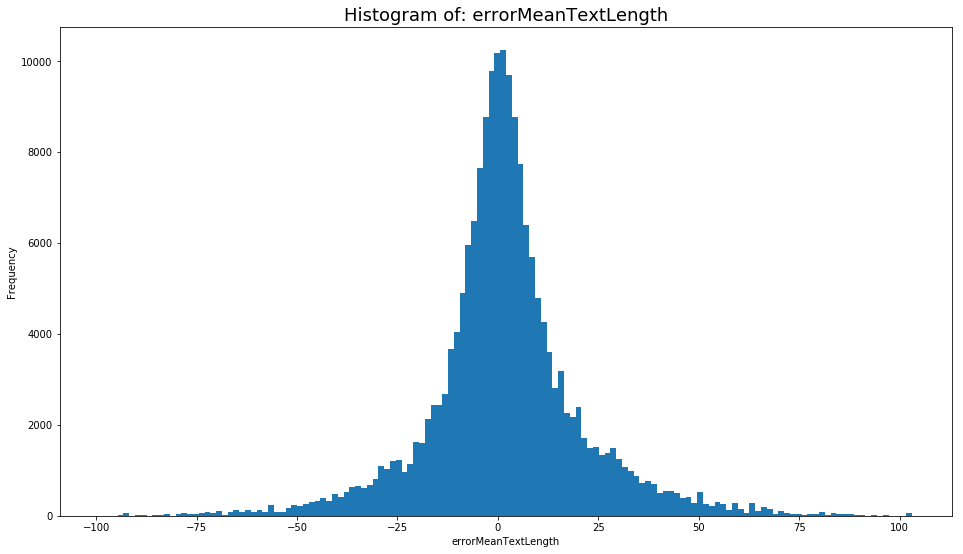

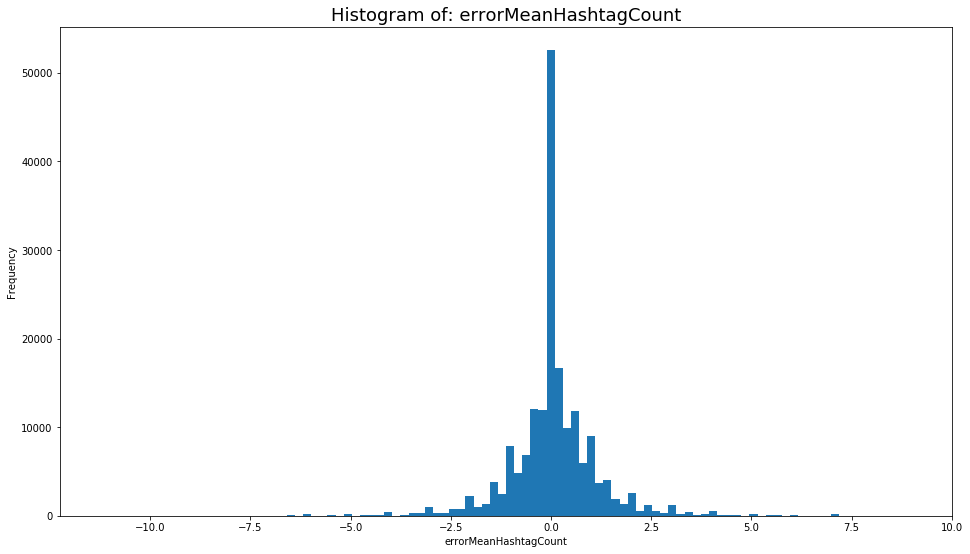

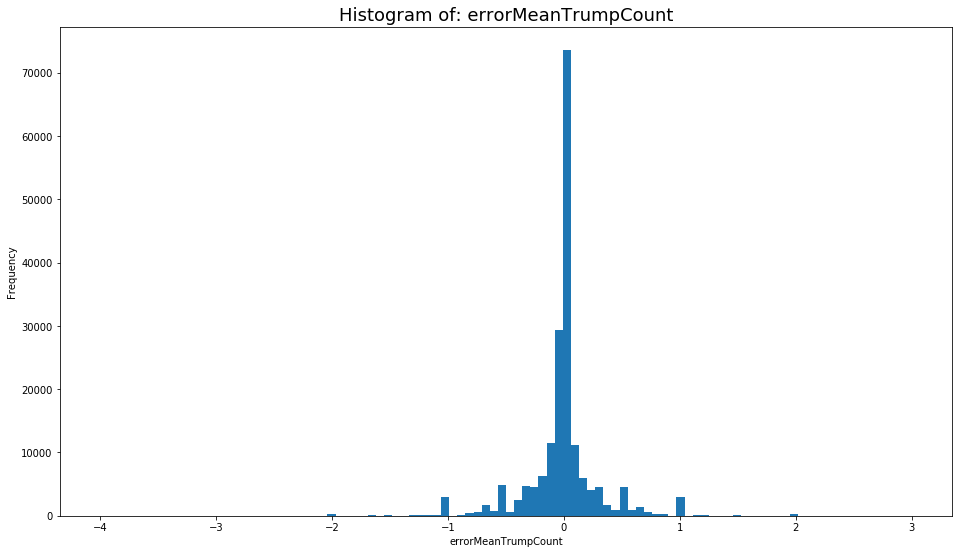

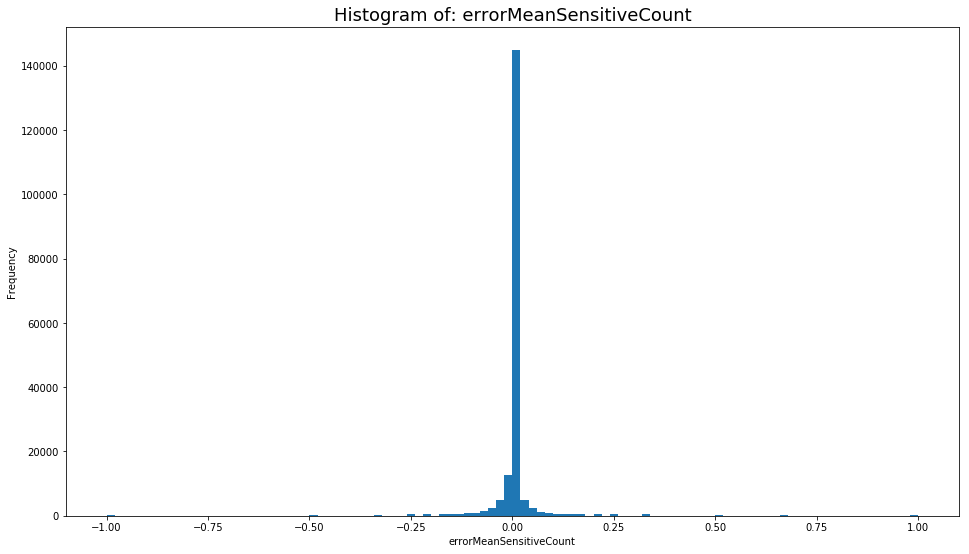

In [17]:
plotErrorHist(predEvaluation, 'errorCount', bins=500)
plotErrorHist(predEvaluation, 'errorMeanTextLength', bins=140)
plotErrorHist(predEvaluation, 'errorMeanHashtagCount', bins=100)
plotErrorHist(predEvaluation, 'errorMeanTrumpCount', bins=100)
plotErrorHist(predEvaluation, 'errorMeanSensitiveCount', bins=100)

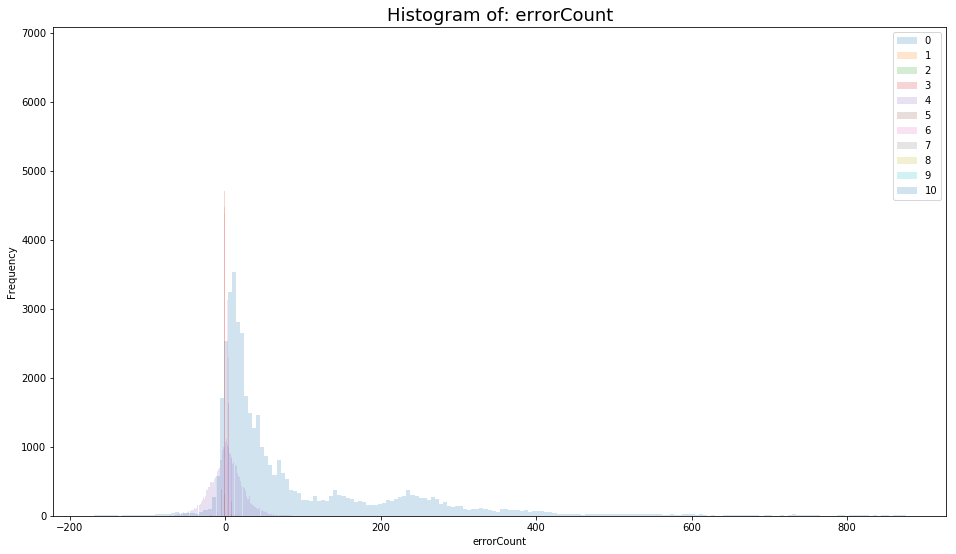

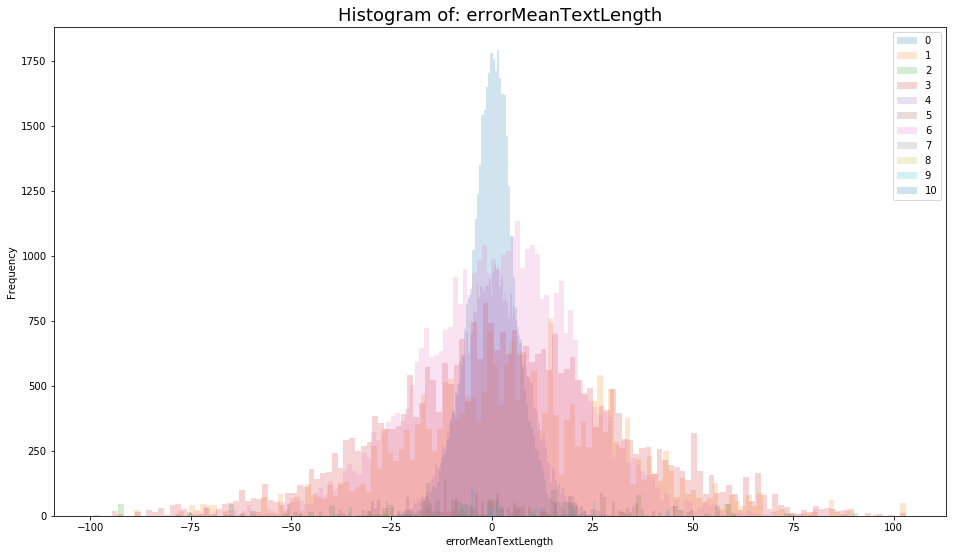

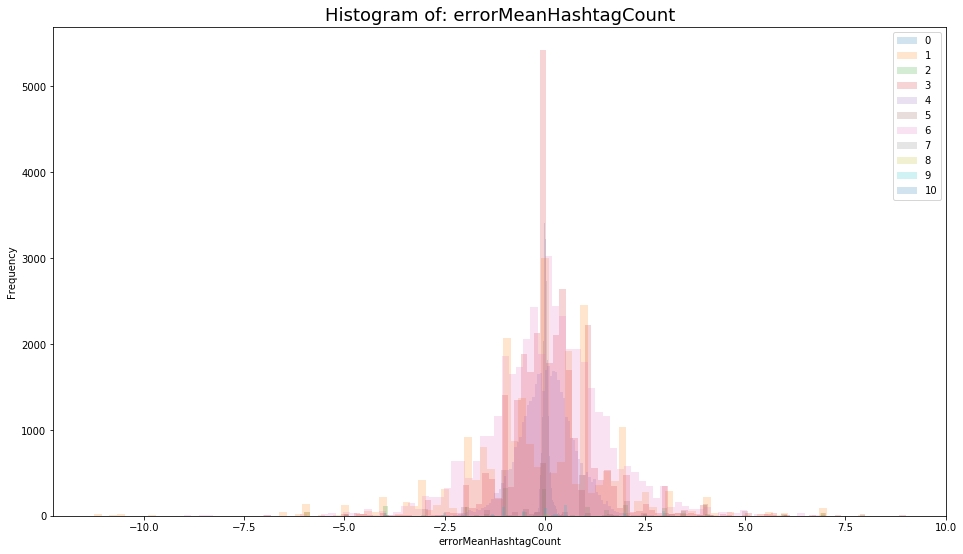

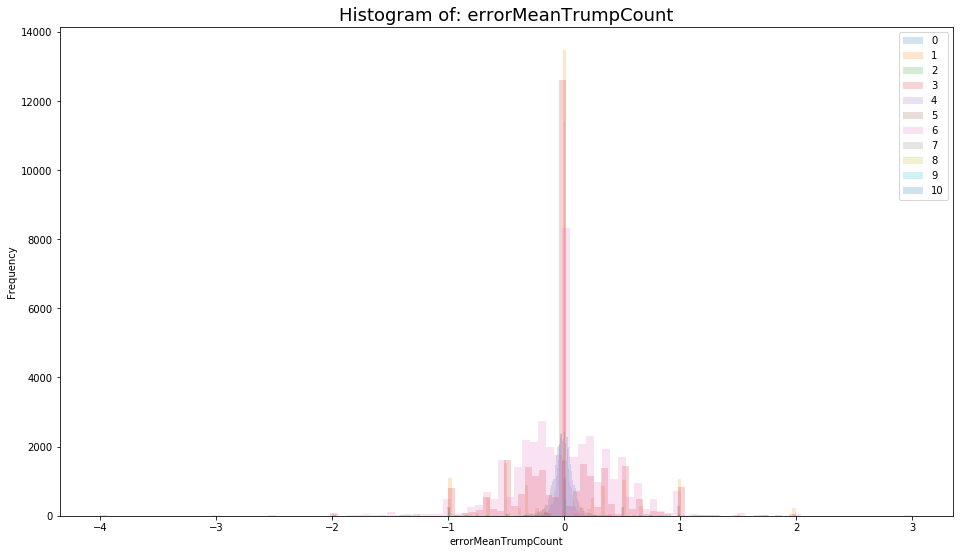

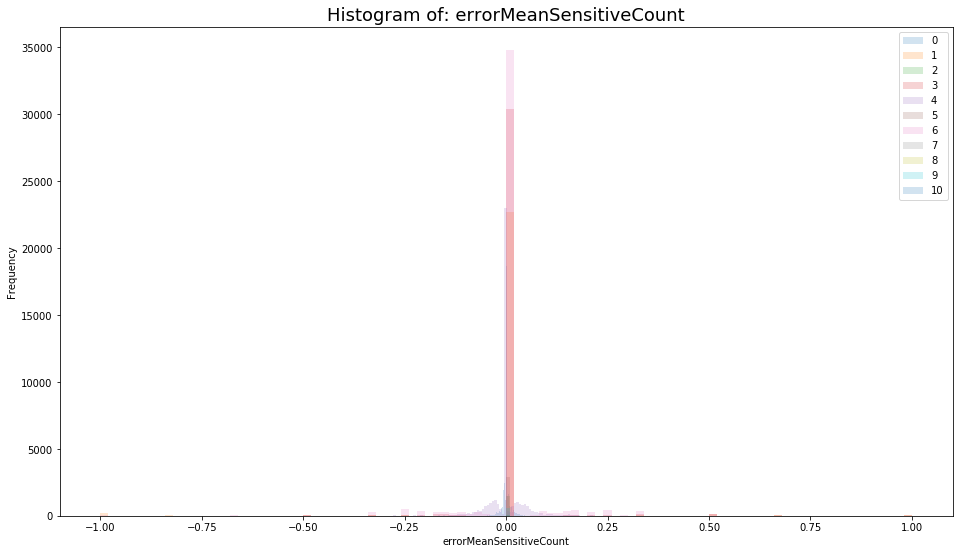

In [18]:
plotErrorHistList(evalTimeseriesList, 'errorCount', bins=200)
plotErrorHistList(evalTimeseriesList, 'errorMeanTextLength', bins=140)
plotErrorHistList(evalTimeseriesList, 'errorMeanHashtagCount', bins=100)
plotErrorHistList(evalTimeseriesList, 'errorMeanTrumpCount', bins=100)
plotErrorHistList(evalTimeseriesList, 'errorMeanSensitiveCount', bins=100)